In [3]:
from dotenv import load_dotenv

load_dotenv(dotenv_path=".env", override=True)

True

In [4]:
import nest_asyncio
nest_asyncio.apply()

In [5]:
import pandas as pd

# (1) QueryDecompose 임포트
from autorag.nodes.queryexpansion.query_decompose import QueryDecompose

# (2) generator_dict 에 대한 설정
#     1) 직접 module_type 지정
generator_dict = {
    "generator_module_type": "llama_index_llm",  # 예) 이 이름에 해당하는 클래스를 get_support_modules가 로드
    "llm": "openai",        # 예시: openai
    "model": "gpt-4o", # 예시: gpt-4o-mini
    # 기타 필요한 파라미터...
}

#     2) generator_dict 에 'generator_module_type'가 없으면, 
#        make_generator_callable_param에서 위 값들이 기본으로 설정됨

# (3) QueryDecompose 인스턴스 생성
project_dir = "./autorag/project_dir2"
decomposer = QueryDecompose(
    project_dir=project_dir,
    **generator_dict  # -> make_generator_callable_param() 호출로 실제 Generator 인스턴스 생성
)

# (4) 쿼리만 있는 DataFrame 준비
df_input = pd.DataFrame({
    "query": [
        # "How can I match color and exposure settings on both the Fujifilm GFX100II and the X-E4, which film simulations and ISO ranges should I use for consistent results, and what key differences do I need to consider due to the different sensor sizes?"
        "How to adjust focus?"
        # "How can I maintain a shallow depth of field in Aperture Priority mode while also ensuring my shutter speed doesn't drop below a certain threshold, and is there a way to use Auto ISO to compensate?"
        # "how to adjust focus?"
        # "Is Hamlet more common on IMDB than Comedy of Errors?",
        # "How do I adjust the aperture on the GFX100ii and also set the shutter speed on the X-T5?",
        # "Is it legal for a licensed child driving Mercedes-Benz to be employed in US?"
    ]
})

# (5) 질의 분해 수행 (기본 prompt 사용)
QD_result_df = decomposer.pure(previous_result=df_input)

# (6) 결과 확인
# print(result_df.columns)
# -> Index(['queries'], dtype='object')

# print(result_df["queries"][0])
# -> 예: ["How many listings of Hamlet are there on IMDB?",
#         "How many listings of Comedy of Errors are there on IMDB?"]


[02/05/25 09:16:43] INFO     [base.py:17] >> Initialize query expansion node - QueryDecompose module...  ]8;id=621960;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=204786;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#17\17]8;;\

                    INFO     [base.py:19] >> Initialize generator node - LlamaIndexLLM                   ]8;id=304307;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=398465;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#19\19]8;;\

                    INFO     [base.py:31] >> Running query expansion node - QueryDecompose module...     ]8;id=294883;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=767214;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=714664;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=300117;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

[02/05/25 09:16:45] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=710188;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=145412;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

/home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
QD_result_df["queries"][0]

['How to adjust focus?']

In [7]:
import pandas as pd

# 1) MultiQueryExpansion 임포트
from autorag.nodes.queryexpansion.multi_query_expansion import MultiQueryExpansion

# 2) generator_dict 설정
generator_dict = {
    "generator_module_type": "llama_index_llm",
    "llm": "openai",
    "model": "gpt-4o",
    # 기타 필요한 파라미터...
}

# 3) MultiQueryExpansion 인스턴스 생성
project_dir = "./autorag/project_dir2"
mqe = MultiQueryExpansion(
    project_dir=project_dir,
    **generator_dict
)

# 4) 확장할 쿼리만 들어 있는 DataFrame 준비
df_input = pd.DataFrame({
    "query": 
        QD_result_df["queries"][0]
        # "How can I maintain a shallow depth of field in Aperture Priority mode?", 
        # "Is face detection available on the X-S20?"
    
})

# 5) 멀티 쿼리 확장 (기본 prompt 사용)
MQE_result_df = mqe.pure(previous_result=df_input)

# 6) 결과 확인
# print(result_df)


[02/05/25 09:16:51] INFO     [base.py:17] >> Initialize query expansion node - MultiQueryExpansion       ]8;id=910604;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=797687;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#17\17]8;;\
                             module...                                                                             

                    INFO     [base.py:19] >> Initialize generator node - LlamaIndexLLM                   ]8;id=102165;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=294817;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#19\19]8;;\

                    INFO     [base.py:31] >> Running query expansion node - MultiQueryExpansion          ]8;id=885585;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=527394;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\
                             module...                                                                             

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=371377;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=449100;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

[02/05/25 09:16:52] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=404154;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=29717;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

In [8]:
list(MQE_result_df["queries"])

[['How to adjust focus?',
  'How can I change the focus settings?',
  'What are the steps to modify the focus?',
  'How do I alter the focus on my camera?']]

In [9]:
MQE_result_df['queries'][0]

['How to adjust focus?',
 'How can I change the focus settings?',
 'What are the steps to modify the focus?',
 'How do I alter the focus on my camera?']

In [10]:
import time
import os
from pinecone.grpc import PineconeGRPC as Pinecone
from pinecone import ServerlessSpec
from dotenv import load_dotenv

load_dotenv(dotenv_path=".env", override=True)

pc = Pinecone(api_key=os.getenv("PINECONE_API_KEY"))

spec = ServerlessSpec(cloud="aws", region="us-east-1")

index_name = 'camera-document'

# check if index already exists (it shouldn't if this is your first run)
if index_name not in pc.list_indexes().names():
    # if does not exist, create index
    pc.create_index(
        index_name,
        dimension=1536,  # dimensionality of text-embed-3-small
        metric='dotproduct',
        spec=spec
    )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
time.sleep(1)
# view index stats
index.describe_index_stats()

[02/05/25 09:17:01] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=433746;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=699987;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAGprojects_env/lib/python3.12/site-package                                  
                             s/pinecone_plugins'])                                                                 

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=579906;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=333488;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

                    INFO     [installation.py:10] >> Installing plugin inference into            ]8;id=66186;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py\installation.py]8;;\:]8;id=241364;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/installation.py#10\10]8;;\
                             PineconeGRPC                                                                          

[02/05/25 09:17:02] INFO     [discover_namespace_packages.py:12] >> Discovering   ]8;id=36351;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py\discover_namespace_packages.py]8;;\:]8;id=376229;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_namespace_packages.py#12\12]8;;\
                             subpackages in                                                                        
                             _NamespacePath(['/home/jeongho/git/SKN05-FINAL-1TEAM                                  
                             /jeongho/RAGprojects_env/lib/python3.12/site-package                                  
                             s/pinecone_plugins'])                                                                 

                    INFO     [discover_plugins.py:9] >> Looking for plugins in                ]8;id=691021;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py\discover_plugins.py]8;;\:]8;id=297004;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/pinecone_plugin_interface/actions/discover_plugins.py#9\9]8;;\
                             pinecone_plugins.inference                                                            

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 1843}},
 'total_vector_count': 1843}

In [11]:
from openai import OpenAI
import pandas as pd

client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY")
)

# MODEL = documents[0].metadata['embedding_model']
MODEL = 'text-embedding-3-small'

# 예시: 두 개의 질의(queries)를 가진 데이터프레임
df_queries = pd.DataFrame({
    "query": MQE_result_df['queries'][0]
})
query_results = []
for query in df_queries["query"]:
    xq = client.embeddings.create(input=query, model=MODEL).data[0].embedding
    query_results.append(index.query(
            xq,
            # filter={
            #     "model": {"$eq": "x-t5"}
            # },
            top_k=10,
            include_metadata=True
            )
        )

[02/05/25 09:17:06] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=511112;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=313319;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/05/25 09:17:13] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=250915;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=560669;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/05/25 09:17:14] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=700147;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=956502;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/05/25 09:17:15] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=68223;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=199573;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

In [12]:
len(query_results[0]['matches'])

10

In [13]:
query_results

[{'matches': [{'id': 'x100v_page73',
               'metadata': {'chapter': 'Taking Photographs',
                            'model': 'x100v',
                            'page': 73.0,
                            'parsing_result': '# Manual Focus\n'
                                              '\n'
                                              'Adjust focus manually.\n'
                                              '\n'
                                              '1. Slide the focus mode selector '
                                              'to **M**.\n'
                                              '\n'
                                              '   !Focus Mode Selector\n'
                                              '\n'
                                              '   **MF** will appear in the '
                                              'display.\n'
                                              '\n'
                                              '   !MF Display\n'
   

In [14]:
semantic_ids = []
semantic_scores = []
for single_query_result in query_results:
    single_query_result_ids = []
    single_query_result_scores = []
    for doc_info in single_query_result['matches']:
        single_query_result_ids.append(doc_info['id'])
        single_query_result_scores.append(doc_info['score'])
    semantic_ids.append(single_query_result_ids)
    semantic_scores.append(single_query_result_scores)

In [15]:
from autorag.nodes.retrieval import bm25
import pandas as pd

corpus_df = pd.read_parquet("autorag/project_dir/data/corpus.parquet")

In [16]:
import os

pkl_dir = "./autorag/project_dir/resources"
if not os.path.exists(pkl_dir):
    os.makedirs(pkl_dir)

pkl_path = os.path.join(pkl_dir, "bm25_porter_stemmer.pkl")

bm25.bm25_ingest(pkl_path, corpus_df, bm25_tokenizer="porter_stemmer")

In [17]:
bm25_retriever = bm25.BM25(project_dir="./autorag/project_dir", bm25_tokenizer="porter_stemmer")

[02/05/25 09:17:25] INFO     [base.py:18] >> Initialize retrieval node - BM25                            ]8;id=692787;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py\base.py]8;;\:]8;id=230743;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py#18\18]8;;\

In [18]:
import pandas as pd

# 예시: 두 개의 질의(queries)를 가진 데이터프레임
df_queries = pd.DataFrame({
    "query": MQE_result_df['queries'][0]
})


In [19]:
# lexical_results_df = bm25_retriever.pure(df_queries, top_k=10, selected_model = "gfx100ii")
lexical_results_df = bm25_retriever.pure(df_queries, top_k=10, )


[02/05/25 09:17:30] INFO     [base.py:31] >> Running retrieval node - BM25 module...                     ]8;id=232727;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py\base.py]8;;\:]8;id=438838;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py#31\31]8;;\

In [20]:
lexical_results_df['retrieved_ids'][0]

['x100v_page8',
 'gfx100ii_page343',
 'x100v_page7',
 'gfx100ii_page344',
 'x100v_page209',
 'x-e4_page216',
 'x-e4_page9',
 'x-e4_page53',
 'x-s20_page279',
 'x100v_page54']

In [21]:
lexical_results_df

,retrieved_contents,retrieved_ids,retrieve_scores
0,[# Before You Begin\n\n## The Exposure Compens...,"[x100v_page8, gfx100ii_page343, x100v_page7, g...","[2.25038256360854, 2.2094606516857036, 2.11368..."
1,[# Basic Setup\n\n## Choosing a Different Lang...,"[x-s20_page45, x-e4_page39, x100v_page42, gfx1...","[5.255978949872548, 5.255978949872548, 5.25597..."
2,[# RAW CONVERSION\n\nEven if you don’t have a ...,"[gfx100ii_page221, x-t5_page226, x-s20_page225...","[9.565870260697878, 9.039752971085424, 6.49637..."
3,"[# Program Shift\n\nIf desired, you can rotate...","[x-s20_page72, gfx100ii_page77, x100v_page57, ...","[7.866744266228143, 7.793092904463249, 7.79309..."


In [22]:
lexical_ids = lexical_results_df["retrieved_ids"]
lexical_scores = lexical_results_df["retrieve_scores"]

In [23]:
from autorag.nodes.retrieval.hybrid_cc import hybrid_cc

ids = (semantic_ids, lexical_ids)
scores = (semantic_scores, lexical_scores)

top_k = 10
weight = 0.7             # semantic 쪽 가중치 0.7, lexical 쪽 가중치 0.3
normalize_method = "mm"  # min-max 정규화

fused_ids, fused_scores = hybrid_cc(
    ids=ids,
    scores=scores,
    top_k=top_k,
    weight=weight,
    normalize_method=normalize_method,
    semantic_theoretical_min_value=-1.0,  # tmm 모드 사용 시 필요한 값
    lexical_theoretical_min_value=0.0     # tmm 모드 사용 시 필요한 값
)

print("Fused IDs:", fused_ids)
print("Fused Scores:", fused_scores)


Fused IDs: [['x100v_page73', 'x-e4_page77', 'x100v_page8', 'x-s20_page100', 'gfx100ii_page343', 'x100v_page72', 'x100v_page7', 'x-e4_page76', 'x-s20_page99', 'gfx100ii_page344'], ['x-s20_page99', 'x100v_page120', 'x100v_page72', 'x-e4_page69', 'x-s20_page92', 'x-s20_page152', 'x100v_page125', 'gfx100ii_page100', 'x-t5_page90', 'x-s20_page45'], ['x-s20_page152', 'x100v_page125', 'x-t5_page147', 'gfx100ii_page221', 'x-t5_page226', 'x100v_page143', 'x-t5_page164', 'x-s20_page225', 'x-e4_page187', 'x100v_page179'], ['x100v_page73', 'x-t5_page91', 'x-s20_page92', 'x-s20_page72', 'x100v_page57', 'gfx100ii_page77', 'x-e4_page69', 'x-e4_page77', 'x-t5_page73', 'x-e4_page76']]
Fused Scores: [[0.7, 0.5715428663914872, 0.30000000000000004, 0.278073043817458, 0.2523882779178166, 0.16212186155203778, 0.14095924473673654, 0.12156503793670066, 0.10364323035201489, 0.09917202166035807], [0.7, 0.6210039951934954, 0.494240199728556, 0.4783976815696957, 0.44730078823607083, 0.4077946949769552, 0.36472022

In [24]:
docs = []
for id in fused_ids[0]:
    docs.append(corpus_df.loc[corpus_df["doc_id"] == id, "contents"].values[0])

In [25]:
import cohere

co = cohere.ClientV2()

response = co.rerank(
    model="rerank-v3.5",
    query=MQE_result_df['queries'][0][0],
    documents=docs,
    top_n=3,
)

[02/05/25 09:17:48] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=436411;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=72103;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

In [27]:
docs

['# Manual Focus\n\nAdjust focus manually.\n\n1. Slide the focus mode selector to **M**.\n\n   !Focus Mode Selector\n\n   **MF** will appear in the display.\n\n   !MF Display\n\n2. Focus manually using the lens focus ring. Rotate the ring left to reduce the focus distance, right to increase.\n\n   !Lens Focus Ring\n\n3. Take pictures.\n\n> 💡 **Tip:**\n> Use **BUTTON/DIAL SETTING > FOCUS RING** to reverse the direction of rotation of the focus ring.',
 '# Manual Focus\n\nAdjust focus manually.\n\n1. Select **MANUAL FOCUS** for **AF/MF SETTING > FOCUS MODE**.\n\n   !Focus Mode Display\n\n2. Focus manually using the lens focus ring. Rotate the ring left to reduce the focus distance, right to increase.\n\n   !Lens Focus Ring\n\n3. Take pictures.\n\n> 💡 **Note:**\n> - Use **BUTTON/DIAL SETTING > FOCUS RING** to reverse the direction of rotation of the focus ring.\n> - Regardless of the option selected, manual focus will be used when the lens is in manual focus mode.',
 '# Before You Begin\n

In [26]:
response

V2RerankResponse(id='1a020709-dd87-4956-963d-0866e6b7cbe8', results=[V2RerankResponseResultsItem(document=None, index=0, relevance_score=0.82288796), V2RerankResponseResultsItem(document=None, index=1, relevance_score=0.82288796), V2RerankResponseResultsItem(document=None, index=3, relevance_score=0.8145405)], meta=ApiMeta(api_version=ApiMetaApiVersion(version='2', is_deprecated=None, is_experimental=None), billed_units=ApiMetaBilledUnits(images=None, input_tokens=None, output_tokens=None, search_units=1.0, classifications=None), tokens=None, warnings=None))

In [29]:
response.results

[V2RerankResponseResultsItem(document=None, index=0, relevance_score=0.82288796),
 V2RerankResponseResultsItem(document=None, index=1, relevance_score=0.82288796),
 V2RerankResponseResultsItem(document=None, index=3, relevance_score=0.8145405)]

In [34]:
response.dict()['results']

[{'index': 0, 'relevance_score': 0.82288796},
 {'index': 1, 'relevance_score': 0.82288796},
 {'index': 3, 'relevance_score': 0.8145405}]

In [38]:
for i in response.dict()['results']:
    print(i['index'])

0
1
3


In [82]:
reordered_list = [docs[i] for i in [0, 2, 1]]
for i in reordered_list:
    print(i)

# Exposure Compensation

Adjust exposure.

Hold the Fn button to which exposure compensation is assigned and rotate the rear command dial to select the desired value.

> 💡 **Note:**
> - The command dial used in this role can be chosen using **BUTTON/DIAL SETTING > COMMAND DIAL SETTING**.

- The amount of compensation available varies with the shooting mode.
- Exposure compensation can be previewed in the shooting display, although the display may not accurately reflect its effects if:
  - the exposure compensation amount exceeds ±3 EV,
  - 200% or 400% is selected for **DYNAMIC RANGE**, or
  - **STRONG** or **WEAK** is selected for **D RANGE PRIORITY**.

Exposure compensation can still be previewed in the viewfinder or LCD monitor by pressing the shutter button halfway. In movie mode, the display may not accurately reflect the effects of exposure compensation during F-Log recording or when 200% or 400% is selected for **DYNAMIC RANGE**. An accurate preview can be obtained by selecting 

    sessionId: int = Field(default=None, description="없으면 새로운 session 생성")
    brand: str
    model: str
    question: str

In [1]:
import startup

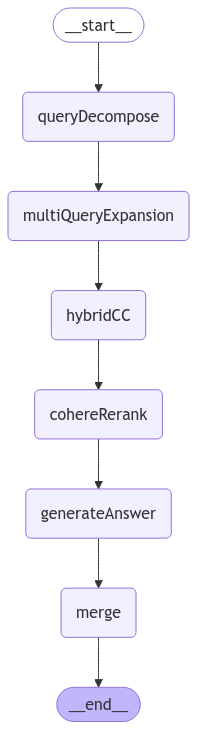

In [8]:
graph.graph

In [6]:
import graph

input_dict = {
    "sessionId": 1,
    "brand": "fuji",
    "model": "x-t5",
    "question": "How to eliminate memory card?"
}
a = graph.graph.invoke(input_dict)

[02/05/25 18:52:20] INFO     [base.py:31] >> Running query expansion node - QueryDecompose module...     ]8;id=167369;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=46894;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=133836;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=570470;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

[02/05/25 18:52:21] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=58424;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=420440;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

/home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                    INFO     [base.py:31] >> Running query expansion node - MultiQueryExpansion          ]8;id=678047;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py\base.py]8;;\:]8;id=21087;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/queryexpansion/base.py#31\31]8;;\
                             module...                                                                             

                    INFO     [base.py:26] >> Running generator node - LlamaIndexLLM module...            ]8;id=341864;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py\base.py]8;;\:]8;id=511636;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/generator/base.py#26\26]8;;\

[02/05/25 18:52:24] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=264461;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=607974;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

[02/05/25 18:52:25] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=471584;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=454951;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/05/25 18:52:26] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=198951;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=695791;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/05/25 18:52:28] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=405326;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=179790;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/05/25 18:52:29] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=826709;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=648505;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"                                

[02/05/25 18:52:30] INFO     [base.py:31] >> Running retrieval node - BM25 module...                     ]8;id=246399;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py\base.py]8;;\:]8;id=276200;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/autorag/nodes/retrieval/base.py#31\31]8;;\

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=684248;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=170256;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=399123;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=434849;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

                    INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=737722;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=996720;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

[02/05/25 18:52:31] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=686162;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=21320;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"                                    

[02/05/25 18:52:35] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=24113;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=102857;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

[02/05/25 18:52:36] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=636574;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=422015;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

                    INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=479888;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=687939;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

[02/05/25 18:52:39] INFO     [_client.py:1773] >> HTTP Request: POST                                ]8;id=546970;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=421025;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1773\1773]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

[02/05/25 18:53:01] INFO     [_client.py:1026] >> HTTP Request: POST                                ]8;id=408319;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=358603;file:///home/jeongho/git/SKN05-FINAL-1TEAM/jeongho/RAGprojects_env/lib/python3.12/site-packages/httpx/_client.py#1026\1026]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

In [7]:
from IPython.display import display, Markdown

markdown_text = a['temp']

display(Markdown(markdown_text))


To remove a memory card from your camera, follow these steps:

1. **Turn Off the Camera**: Ensure the camera is powered down before attempting to remove the memory card to prevent data corruption or damage.

2. **Open the Memory Card Slot Cover**: Unlatch and open the cover to access the memory card slot.

3. **Eject the Card**: 
   - Press the center of the card gently with your finger.
   - Slowly release your finger to allow the card to pop out slightly from the slot.
   - Carefully remove the card by hand.

> **Caution**: Avoid suddenly removing your finger from the card to prevent it from falling. If the camera displays a warning icon indicating the card is hot, wait for it to cool before removing to avoid injury.

> ⚠️ **Warning**: Do not remove the memory card while it is being formatted, or while data is being recorded to or deleted from the card, as this could damage the card.

![Removing Memory Card Diagram](../indexing/data/image/x-t5/extracted_images/x-t5_page39_image1.png)

In [16]:
# {model}_page{page}
from glob import glob
import os

model = "x-e4"
page = 8
data_dir = "../indexing/data"
image_dir = os.path.join(data_dir, 'image')

list = glob(os.path.join(image_dir, model, "extracted_images",f"{model}_page{page}_*"))

In [17]:
list

['../indexing/data/image/x-e4/extracted_images/x-e4_page8_image1.png',
 '../indexing/data/image/x-e4/extracted_images/x-e4_page8_image2.png']

In [14]:
!ls ../indexing/data

image  json  legacy_data  raw_data
